## Preprocessing

In [175]:
import numpy as np
import pandas as pd
from utils.preprocessing import load_entities, load_tokens, get_token_dict, process_entities_data
from utils.classification_report import plot_feature_importance, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'utils.classification_report' (/workspaces/ensae_nlp_project/utils/classification_report.py)

In [2]:
entities = load_entities('data/entities.json')
tokens = load_tokens('data/tokens.yml')
token_dict = get_token_dict(tokens)

In [3]:
df = process_entities_data(token_dict, entities)

  0%|          | 0/1218 [00:00<?, ?it/s]

 51%|█████     | 623/1218 [00:00<00:00, 2509.47it/s]

Error processing entry:  L. et Cher
Invalid line format: Expected even number of elements
Error processing entry:  L et Ch
Invalid line format: Expected even number of elements
Error processing entry: L. et Ch.
Invalid line format: Expected even number of elements
Error processing entry: Cher
Invalid line format: Expected even number of elements


100%|██████████| 1218/1218 [00:00<00:00, 2769.13it/s]


Error processing entry: $$
Invalid line format: Expected even number of elements
Error processing entry: +
Invalid line format: Expected even number of elements
Error processing entry: Mauplin ⒻPierre ⓂJournalier ⒽChef de ménage Ⓐ43 ⒸHomme marié Ⓘidem
Invalid line format: Expected even number of elements


## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25074 entries, 0 to 25073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   surname            19159 non-null  object
 1   firstname          24930 non-null  object
 2   occupation         16178 non-null  object
 3   age                16435 non-null  object
 4   civil_status       10704 non-null  object
 5   nationality        13314 non-null  object
 6   surname_household  5640 non-null   object
 7   link               20735 non-null  object
 8   birth_date         7344 non-null   object
 9   lob                9235 non-null   object
 10  employer           2911 non-null   object
 11  observation        602 non-null    object
dtypes: object(12)
memory usage: 2.3+ MB


In [5]:
df.head()

,surname,firstname,occupation,age,civil_status,nationality,surname_household,link,birth_date,lob,employer,observation
0,Breton,Cyrille,menuisier,25,Garçon,française,NaN,NaN,NaN,NaN,NaN,NaN
1,Vignat,Zélie,prop re,30,NaN,française,NaN,sa fe,NaN,NaN,NaN,NaN
2,Houy,Caroline,domestique,24,Fille,française,NaN,NaN,NaN,NaN,NaN,NaN
3,Violet,Esther,fe de chambre,24,Fille,française,NaN,NaN,NaN,NaN,NaN,NaN
4,Apelmeau,Thérèse,domestique,49,Femme mariée,française,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

%matplotlib inline

In [9]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("data/output/entities_profiling_report.html")

In [11]:
df.to_csv("data/output/entities_processed.csv", index=False)

- remove `ìdem` values
- remove `néant` values
- remove `sp` and `s.p` values in profession
- 

profession : fusionner `néant` / `sp` / `s.p` et `sans`

surname_household : fusionner `ve` / `vve` / `veuve`

In [81]:
# change the data type of 'age' and 'birth_date' to int and handle the missing values
# ignore the errors with 'coerce' to convert the invalid values to NaN 

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['birth_date'] = pd.to_numeric(df['birth_date'], errors='coerce')

In [82]:
# Replace specific values in 'occupation' column
df['occupation'] = df['occupation'].replace(['néant', 's.p', 's.p.', 'sans', 'sp', 's p', 's. prof'], 'sans profession')
df['occupation'] = df['occupation'].replace(['cult', 'cult r'], 'cultivateur')

In [83]:
# Replace specific values in 'surname_household' column
df['surname_household'] = df['surname_household'].replace(['vve', 'Veuve', 'Vve'], 'veuve')

In [84]:
# Replace 'idem' with NaN in all columns
df = df.replace('idem', np.nan)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25074 entries, 0 to 25073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   surname            18490 non-null  object 
 1   firstname          24914 non-null  object 
 2   occupation         12483 non-null  object 
 3   age                15943 non-null  float64
 4   civil_status       10704 non-null  object 
 5   nationality        8865 non-null   object 
 6   surname_household  5636 non-null   object 
 7   link               18597 non-null  object 
 8   birth_date         7337 non-null   float64
 9   lob                5858 non-null   object 
 10  employer           2306 non-null   object 
 11  observation        514 non-null    object 
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


In [17]:
df.to_csv("data/entities_processed_and_cleaned.csv", index=False)

In [18]:
profile = ProfileReport(df, title="Profiling Report After Cleaning")
profile.to_file("data/output/entities_profiling_report_after_cleaning.html")

## EDA

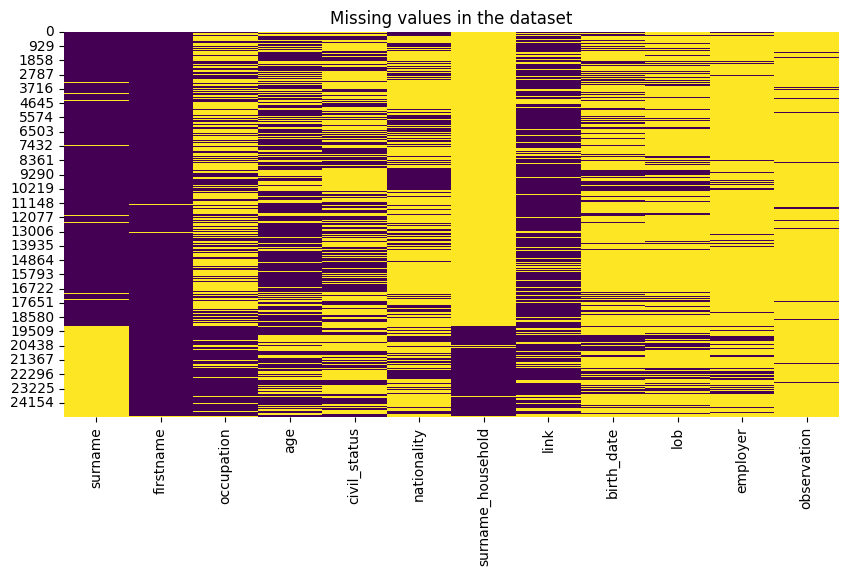

In [86]:
# plot missing values in the dataset

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

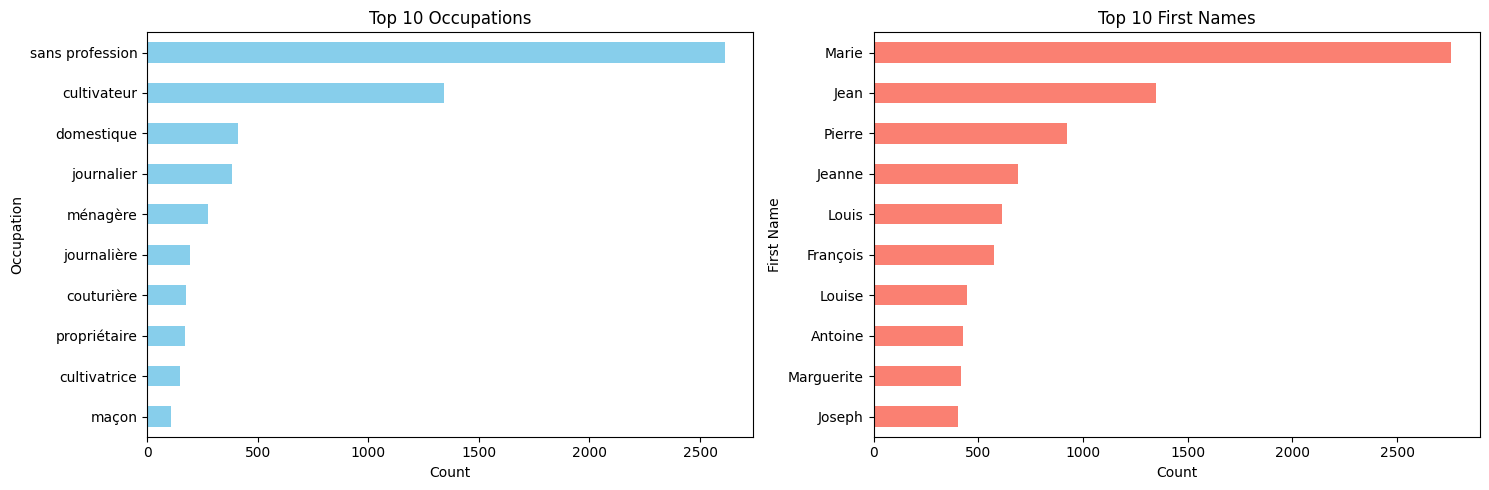

In [123]:
# plot top 10 occupations and top 10 first names in the dataset in horizontal bar plots

# top 10 occupations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
# sort the values and plot the top 10 occupations
df['occupation'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')

# top 10 first names
plt.subplot(1, 2, 2)
df['firstname'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Top 10 First Names')
plt.xlabel('Count')
plt.ylabel('First Name')

plt.tight_layout()
plt.show()

## Modelling

In [89]:
# define X and y for the model

X = df.drop(columns=['surname_household'])
y = df['surname_household'].apply(
                                lambda x: 0 if pd.isna(x) else 1
                            )

In [90]:
# split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the training and testing sets

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20059, 11), (5015, 11), (20059,), (5015,))

In [70]:
# check the distribution of the target variable in the training and testing sets

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(surname_household
 0    0.773269
 1    0.226731
 Name: proportion, dtype: float64,
 surname_household
 0    0.783051
 1    0.216949
 Name: proportion, dtype: float64)

In [91]:
# define a pipeline for the Random Forest model

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# define the preprocessing steps for the model
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# fit the model on the training data

model.fit(X_train, y_train)

# make predictions on the testing data

y_pred = model.predict(X_test)

# evaluate the model

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3927
           1       0.99      0.99      0.99      1088

    accuracy                           0.99      5015
   macro avg       0.99      0.99      0.99      5015
weighted avg       0.99      0.99      0.99      5015



In [92]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['age', 'birth_date'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['surname', 'firstname', 'occupation', 'civil_status', 'nationality',
       'link', 'lob', 'employer', 'observation'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [167]:
plot_confusion_matrix(model, y_pred=y_pred, y_test=y_test)

NameError: name 'plot_confusion_matrix' is not defined

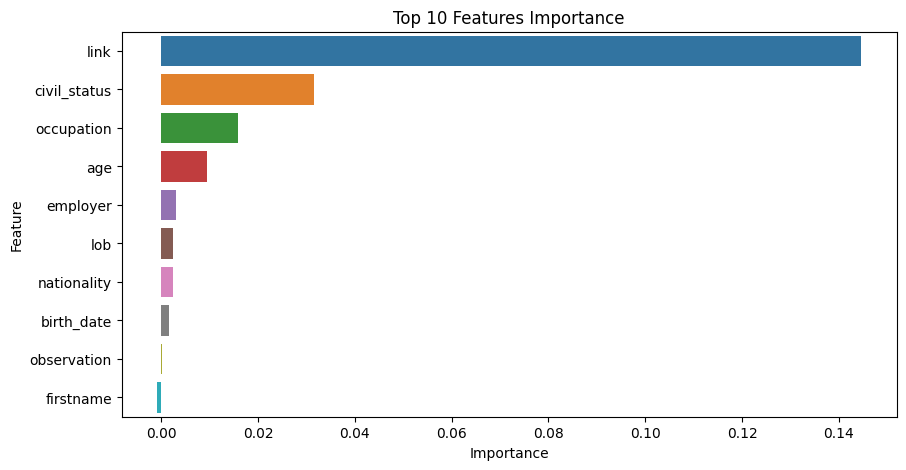

In [166]:
plot_feature_importance(model, X_test, y_test)

In [135]:
# now we make the same process but without the 'surname' column

X = df.drop(columns=['surname', 'surname_household'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# define the preprocessing steps for the model
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# fit the model on the training data

model.fit(X_train, y_train)

# make predictions on the testing data

y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3927
           1       0.81      0.87      0.84      1088

    accuracy                           0.93      5015
   macro avg       0.89      0.91      0.90      5015
weighted avg       0.93      0.93      0.93      5015



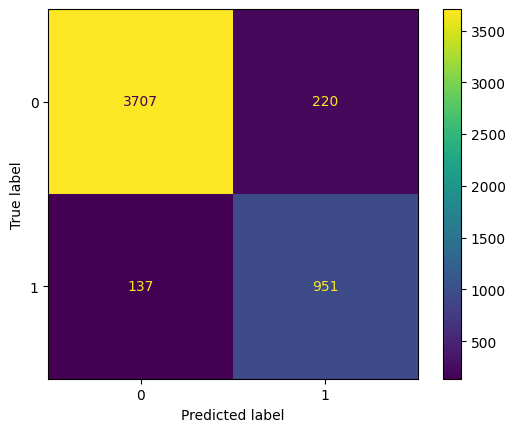

In [137]:
# plot confusion matrix

plot_confusion_matrix(model, y_pred=y_pred, y_test=y_test)

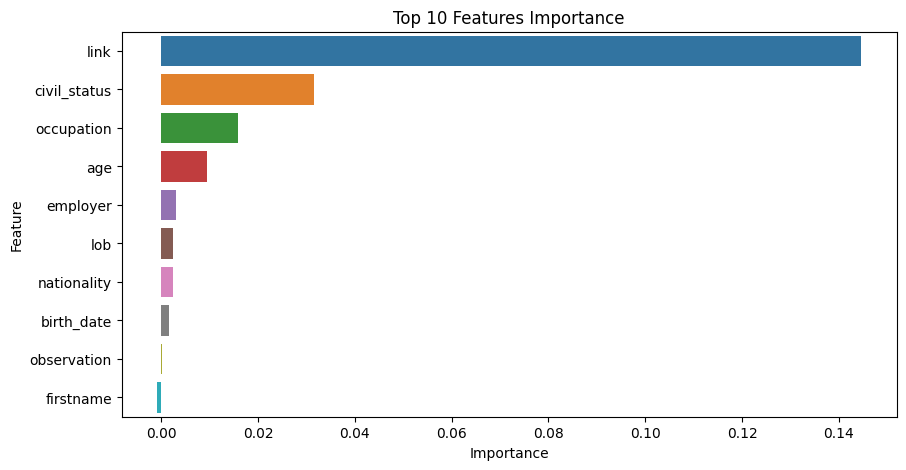

In [138]:
# calculate the feature importance using permutation importance
plot_feature_importance(model, X_test, y_test)

## Hyperparameter tuning

In [159]:
# use random search to find the best hyperparameters for the model
from sklearn.model_selection import RandomizedSearchCV

# define the hyperparameters grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [10, 20, 30, 40, 50, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# define the RandomizedSearchCV
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# fit the model on the training data
search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  24.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  25.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  22.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  23.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=a

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
104 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **l

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               Index(['age', 'birth_date'], dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['firs...
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [161]:
# get the best hyperparameters

search.best_params_

{'classifier__n_estimators': 100,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': None,
 'classifier__bootstrap': False}

In [162]:
# make predictions on the testing data using the best model

y_pred = search.predict(X_test)

# evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3927
           1       0.82      0.89      0.85      1088

    accuracy                           0.93      5015
   macro avg       0.89      0.92      0.91      5015
weighted avg       0.94      0.93      0.93      5015



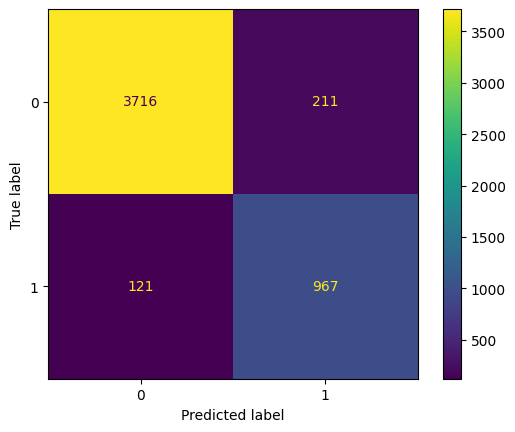

In [163]:
# plot confusion matrix

plot_confusion_matrix(search, y_pred=y_pred, y_test=y_test)

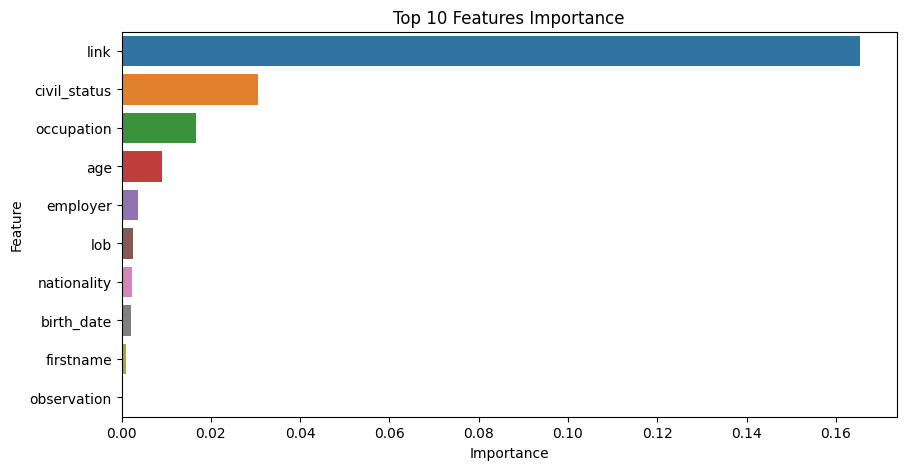

In [176]:
# calculate the feature importance

plot_feature_importance(search, X_test, y_test)
